In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

In [2]:
# Load Dataset 2
file2_path = 'house-votes-84.data'
data2 = pd.read_csv(file2_path, header=None)

In [3]:
# Display Dataset 2 Info
print("Dataset 2 Info:")
print(data2.info())
print("\nFirst few rows of Dataset 2:")
print(data2.head())

Dataset 2 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       435 non-null    object
 1   1       435 non-null    object
 2   2       435 non-null    object
 3   3       435 non-null    object
 4   4       435 non-null    object
 5   5       435 non-null    object
 6   6       435 non-null    object
 7   7       435 non-null    object
 8   8       435 non-null    object
 9   9       435 non-null    object
 10  10      435 non-null    object
 11  11      435 non-null    object
 12  12      435 non-null    object
 13  13      435 non-null    object
 14  14      435 non-null    object
 15  15      435 non-null    object
 16  16      435 non-null    object
dtypes: object(17)
memory usage: 57.9+ KB
None

First few rows of Dataset 2:
           0  1  2  3  4  5  6  7  8  9  10 11 12 13 14 15 16
0  republican  n  y  n  y  y  y  n  n  n  y  ?  y  y  y 

In [4]:
# Replace '?' with NaN for handling missing values
data2.replace('?', np.nan, inplace=True)

# Convert categorical features to numeric using LabelEncoder
label_encoder = LabelEncoder()
for col in data2.columns[1:]:  # Skip the target column
    data2[col] = label_encoder.fit_transform(data2[col].astype(str))

# Impute missing values with the most frequent value (mode)
imputer = SimpleImputer(strategy='most_frequent')
data2.iloc[:, 1:] = imputer.fit_transform(data2.iloc[:, 1:])

In [5]:
# Convert target labels ('republican', 'democrat') to numeric
y2 = LabelEncoder().fit_transform(data2.iloc[:, 0])  # Target column
X2 = data2.iloc[:, 1:]  # Features (exclude target column)

In [6]:
# Split Dataset 2 into train/test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

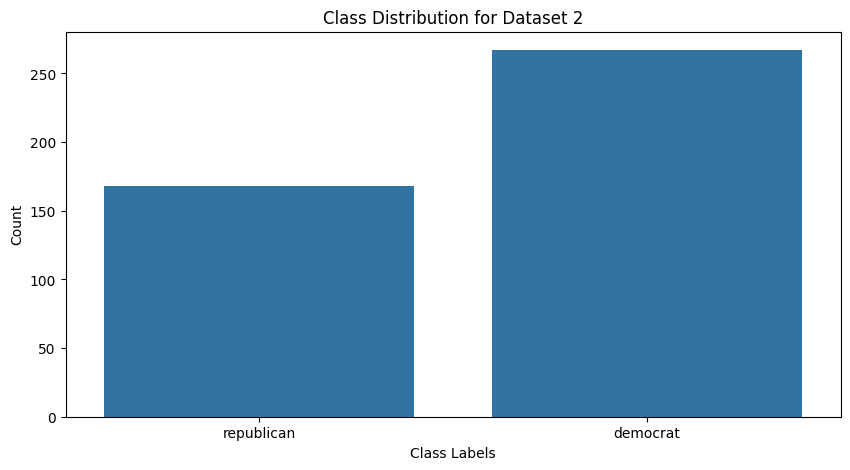

In [7]:
# Plot class distribution
plt.figure(figsize=(10, 5))
sns.countplot(x=data2.iloc[:, 0])
plt.title("Class Distribution for Dataset 2")
plt.xlabel("Class Labels")
plt.ylabel("Count")
plt.show()

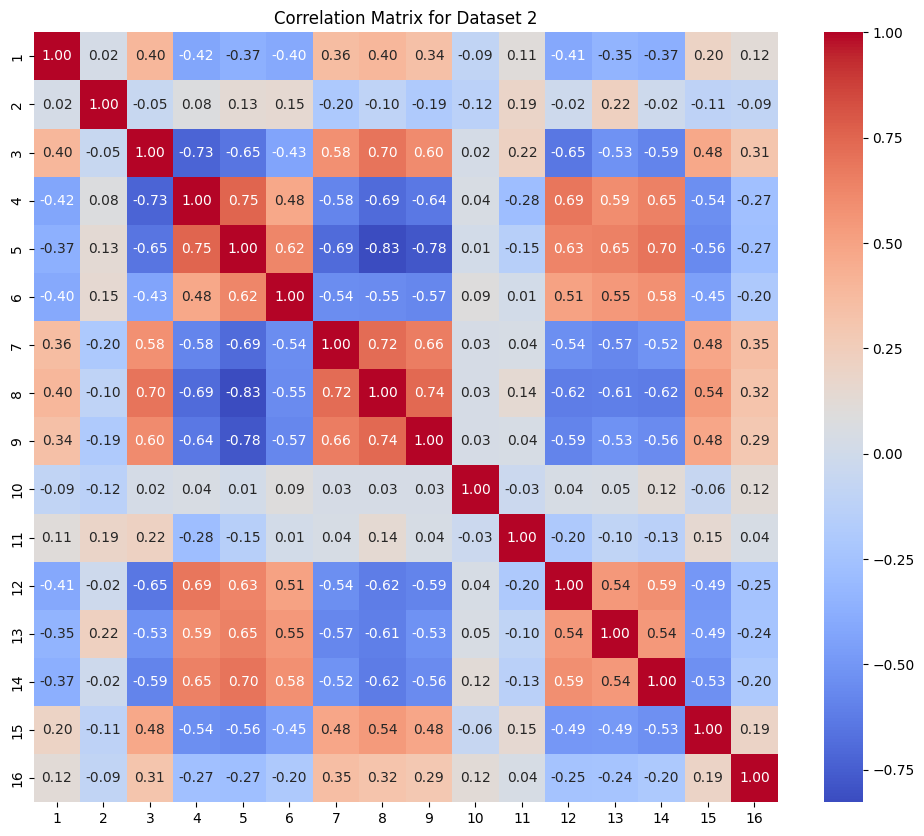

In [8]:
# Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data2.iloc[:, 1:].corr(), annot=True, fmt='.2f', cmap='coolwarm')  # Skip the target column
plt.title("Correlation Matrix for Dataset 2")
plt.show()


In [9]:
# Initialize Models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Perform Cross-Validation
print("\nCross-validation Results for Dataset 2:")
results_2 = {}
for name, model in models.items():
    kf = KFold(n_splits=10, random_state=42, shuffle=True)
    scores = cross_val_score(model, X2_train, y2_train, cv=kf, scoring='f1_macro')
    results_2[name] = scores.mean()
    print(f"{name}: Mean F1 Score = {scores.mean():.4f}")

# Display Best Model
best_model_name_2 = max(results_2, key=results_2.get)
print(f"\nBest Model for Dataset 2: {best_model_name_2} with F1 Score = {results_2[best_model_name_2]:.4f}")


Cross-validation Results for Dataset 2:
Random Forest: Mean F1 Score = 0.9491
Logistic Regression: Mean F1 Score = 0.9496
SVM: Mean F1 Score = 0.9588
KNN: Mean F1 Score = 0.9410
Decision Tree: Mean F1 Score = 0.9042

Best Model for Dataset 2: SVM with F1 Score = 0.9588


In [10]:
# Hyperparameter Tuning for Dataset 2
if best_model_name_2 == "SVM":
    print("\nHyperparameter Tuning for Dataset 2")
    best_model_2 = models[best_model_name_2]
    param_grid_2 = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    }
    grid_2 = GridSearchCV(best_model_2, param_grid_2, cv=5, scoring='f1_macro')
    grid_2.fit(X2_train, y2_train)
    print(f"Best Parameters for Dataset 2: {grid_2.best_params_}")
    print(f"Best F1 Score for Dataset 2 (after tuning): {grid_2.best_score_:.4f}")


Hyperparameter Tuning for Dataset 2
Best Parameters for Dataset 2: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best F1 Score for Dataset 2 (after tuning): 0.9611



Confusion Matrix for Dataset 2:


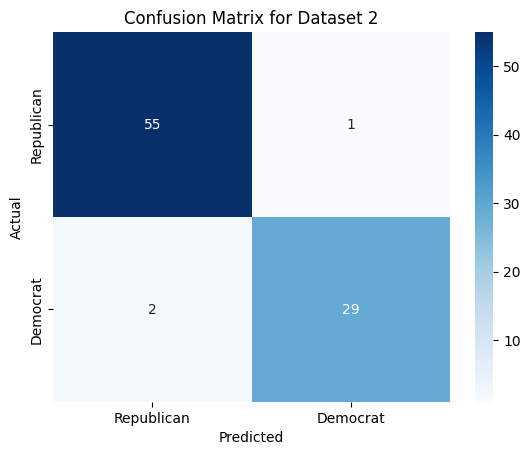


Classification Report for Dataset 2:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        56
           1       0.97      0.94      0.95        31

    accuracy                           0.97        87
   macro avg       0.97      0.96      0.96        87
weighted avg       0.97      0.97      0.97        87



In [11]:
# Confusion Matrix
best_model = grid_2.best_estimator_ if best_model_name_2 == "SVM" else models[best_model_name_2]
y2_pred = best_model.predict(X2_test)

print("\nConfusion Matrix for Dataset 2:")
cm = confusion_matrix(y2_test, y2_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Republican', 'Democrat'], yticklabels=['Republican', 'Democrat'])
plt.title("Confusion Matrix for Dataset 2")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("\nClassification Report for Dataset 2:")
print(classification_report(y2_test, y2_pred))

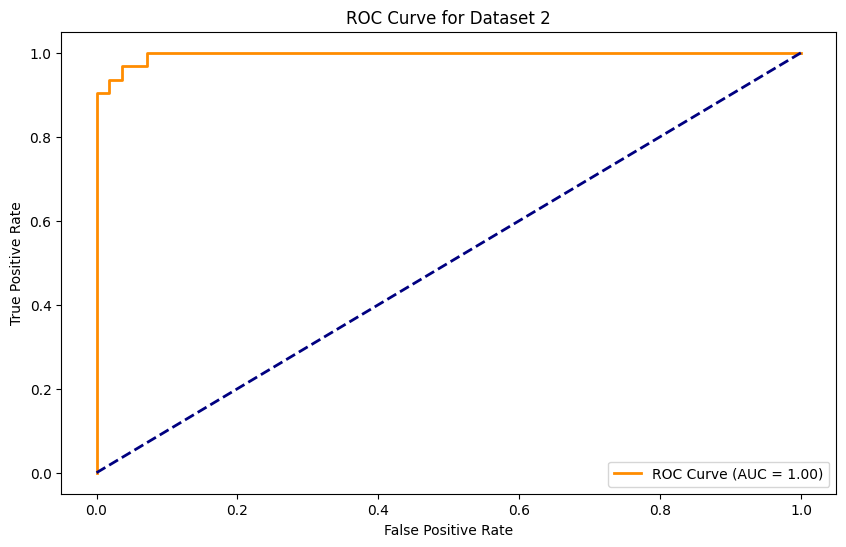

In [12]:
# ROC Curve
y2_pred_prob = best_model.decision_function(X2_test) if best_model_name_2 == "SVM" else best_model.predict_proba(X2_test)[:, 1]
fpr2, tpr2, _ = roc_curve(y2_test, y2_pred_prob)
roc_auc2 = auc(fpr2, tpr2)

plt.figure(figsize=(10, 6))
plt.plot(fpr2, tpr2, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc2:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title("ROC Curve for Dataset 2")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

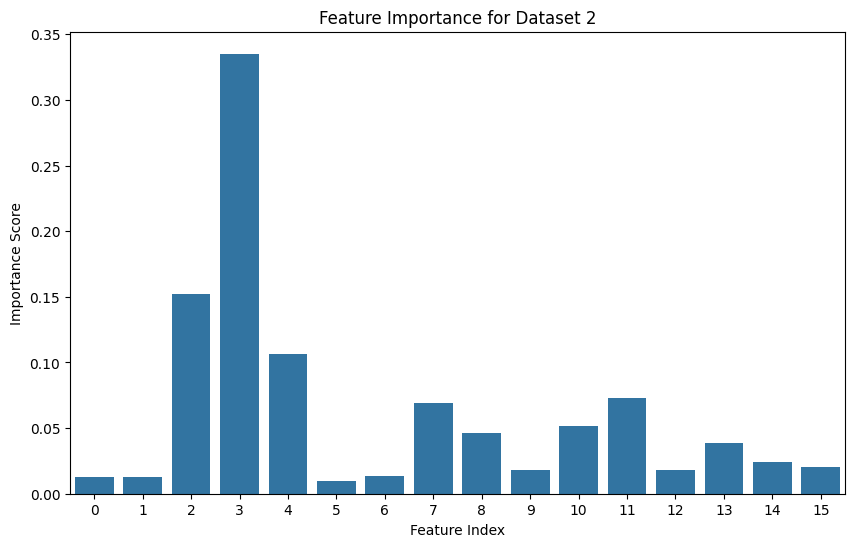

In [13]:
# Feature Importance (Using Random Forest)
rf2 = RandomForestClassifier(random_state=42)
rf2.fit(X2_train, y2_train)
importances2 = rf2.feature_importances_

plt.figure(figsize=(10, 6))
sns.barplot(x=np.arange(len(importances2)), y=importances2)
plt.title("Feature Importance for Dataset 2")
plt.xlabel("Feature Index")
plt.ylabel("Importance Score")
plt.show()

In [15]:
# Thank You, Rahulkumar Shiyani